In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random as rm
import math

In [110]:
# Paso la base de datos.
datos = []
with open("Datos.txt") as file:
    for line in file:
        line = line.strip()
        datos.append (int(line))
    file.close()

print (datos)
# muestra_ale = []
# for _ in range (len(datos)):
#     muestra_ale.append(rm.randint (min(datos),max(datos)))
# x_teo = np.linspace(1,max(datos),max(datos))
# print (x_teo)

[15880, 39538, 81793, 82605, 204498, 227264, 233580, 286433, 308751, 358060, 410756, 494407, 509463, 509840, 541495, 542040, 555647, 576733, 624404, 625260, 639909, 643358, 666058, 675439, 764097, 833745, 862158, 889182, 899982, 905166, 912844, 931337, 1022286, 1042358, 1049567, 1071495, 1110719, 1136524, 1148199, 1252607, 1256011, 1278743, 1299474, 1314226, 1318387, 1380629, 1404468, 1449111, 1471073, 1499950, 1507356, 1529987, 1608331, 1625202, 1689495, 1696326, 1740231, 1750517, 1803590, 1828204, 1838833, 1859250, 1949670, 1982932, 2005102, 2092335, 2100346, 2112995, 2210114, 2235135, 2281928, 2294302, 2294582]


(-0.01, 1.01)

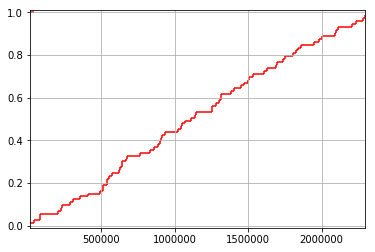

In [125]:
data = datos
y = np.arange(1,len(data)+1)/len(data)

fig, ax = plt.subplots()
ax.set_facecolor('white')

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hlines.html
ax.hlines(y, xmin=data[:-1], xmax=data[1:],
          color='red', zorder=1)

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html
ax.vlines(x=data[1:-1], ymin=y[:-1], ymax=y[1:], color='red',
          linestyle='dashed', zorder=1)

# ax.scatter(data, y, color='red', s=18, zorder=2)
# ax.scatter(data, y, color='white', s=18, zorder=2,
#            edgecolor='red')
ax.grid(True)
ax.set_xlim(data[0], data[-1])
ax.set_ylim([-0.01, 1.01])
# print (data)
# print (len(data[1:-1]))